In [1]:
import keras 
from keras.callbacks import CSVLogger
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [2]:
from tensorflow.keras.datasets import cifar100


## Model Development
### Examine the Data

In [3]:
(train_images_og, train_labels_og), (test_images_og, test_labels_og) = cifar100.load_data()

169001437/169001437 [==============================] - 6s 0us/step


In [4]:
print('tensor shape')
print('\ttraining images:', train_images_og.shape)
print('\ttraining labels:', train_labels_og.shape)
print('\ttraining images:', train_images_og.dtype)
print('\ttraining labels:', train_labels_og.dtype)
print('\ttest images:', test_images_og.shape)
print('\ttest labels:', test_labels_og.shape)

tensor shape
	training images: (50000, 32, 32, 3)
	training labels: (50000, 1)
	training images: uint8
	training labels: int64
	test images: (10000, 32, 32, 3)
	test labels: (10000, 1)


### Show Samples

/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


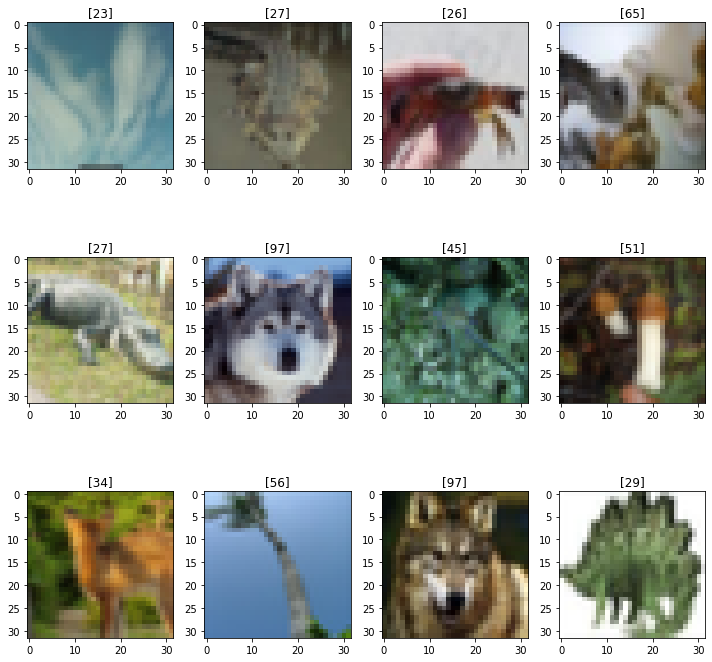

In [5]:
def show_samples(data, labels):
    plt.subplots(figsize=(10, 10))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        k = np.random.randint(0, data.shape[0])
        plt.title(labels[k])
        plt.imshow(data[k])
    plt.tight_layout()
    plt.show()
  
show_samples(train_images_og, train_labels_og)

## Preprocess Data

### One-Hot Encode Labels


In [118]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels_og)
test_labels = to_categorical(test_labels_og)

print('\ttrain labels:', train_labels.shape)
print('\ttest labels:', test_labels.shape)

	train labels: (50000, 100)
	test labels: (10000, 100)


### Reshape Images
Don't need to set float and / 255 because can do this with rescaling layer in network

In [119]:
train_images = train_images_og.reshape((50000, 32, 32, 3))
# train_images = train_images.astype("float32") / 255

test_images = test_images_og.reshape((10000, 32, 32, 3))
# test_images = test_images.astype("float32") / 255

## Baseline Model


In [7]:
train_images_flat = train_images_og.reshape((50000, 32*32*3)).astype('float32') / 255.
test_images_flat = test_images_og.reshape((10000, 32*32*3)).astype('float32') / 255.

### Best model from CW1 to set baseline

In [ ]:
base_model = models.Sequential()
    
#first layer - needs input_shape
base_model.add(layers.Dense(1024, activation='relu', input_shape=(32 * 32 * 3, )))


# middle layers
base_model.add(layers.Dense(1024, activation='relu'))
base_model.add(layers.Dense(1024, activation='relu'))

# last layer
base_model.add(layers.Dense(100, activation='softmax'))

# 
base_model.compile(optimizer=keras.optimizers.Adam(0.0001),
            loss='categorical_crossentropy', 
            metrics=['accuracy'])

base_model_history = base_model.fit(
    train_images_flat, 
    train_labels, 
    epochs=12, 
    verbose=2,
    validation_split=0.2
)

# final_results = base_model.evaluate(test_images, test_labels)

#### Chart Plotting Code

In [25]:
def plot_train_val_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
def plot_train_val_acc(history):
    plt.clf()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
        
    epochs = range(1, len(acc) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'
        
    plt.plot(epochs, acc, blue_dots, label = 'Training Accuracy')
    plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation Accuracy')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

def plot_val_loss_acc(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(1, len(acc) + 1)
    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    # plt.plot(epochs_range, acc, label='Training Accuracy')
    # plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    
 
    plt.plot(epochs_range, acc, blue_dots, label = 'Training Accuracy')
    plt.plot(epochs_range, val_acc, solid_blue_line, label = 'Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, blue_dots, label='Training Loss')
    plt.plot(epochs_range, val_loss, solid_blue_line, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
  
def compare_loss(hist1, hist2, title1, title2): 
    min_epochs = min(len(hist1.history['loss']), len(hist2.history['loss']))
    loss = hist1.history['loss'][:min_epochs]
    val_loss = hist1.history['val_loss'][:min_epochs]
    loss_drop = hist2.history['loss'][:min_epochs]
    val_loss_drop = hist2.history['val_loss'][:min_epochs]

    epochs = range(1, min_epochs + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'
    red_dots = 'ro'
    solid_red_line = 'r'

    plt.plot(epochs, loss, blue_dots, label = f'{title1} Training Loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = f'{title1} Validation Loss')
    plt.plot(epochs, loss_drop, red_dots, label = f'{title2} Training Loss')
    plt.plot(epochs, val_loss_drop, solid_red_line, label = f'{title2} Validation Loss')
    # plt.title('Loss With Dropout Layers')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

def compare_acc(hist1, hist2, title1, title2): 
    min_epochs = min(len(hist1.history['accuracy']), len(hist2.history['accuracy']))
    acc = hist1.history['accuracy'][:min_epochs]
    val_acc = hist1.history['val_accuracy'][:min_epochs]
    acc_drop = hist2.history['accuracy'][:min_epochs]
    val_acc_drop = hist2.history['val_accuracy'][:min_epochs]
    
    epochs = range(1, min_epochs + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'
    red_dots = 'ro'
    solid_red_line = 'r'

    plt.plot(epochs, acc, blue_dots, label = f'{title1} Training Accuracy')
    plt.plot(epochs, val_acc, solid_blue_line, label = f'{title1} Validation Accuracy')
    plt.plot(epochs, acc_drop, red_dots, label = f'{title2} Training Accuracy')
    plt.plot(epochs, val_acc_drop, solid_red_line, label = f'{title2} Validation Accuracy')
    # plt.title('Accuracy With Dropout Layers')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

Base Model Validation Accuracy:  24.63 %


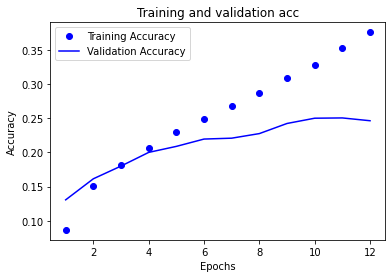

In [11]:
plot_train_val_acc(base_model_history)
print('Base Model Validation Accuracy: ', round(base_model_history.history['val_accuracy'][-1]*100,5),'%')

Baseline Model with Validation Accuracy of 25%


## Develop Model that Overfits
#### Start with basic Conv Network
2 layers, 32 and 64 filters
standard kernal 3x3 with stride 1 - no max pooling


In [12]:
def build_model_1():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Rescaling(1./255)(inputs) 
    x = layers.Conv2D(filters=16, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(100, activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model_1 = build_model_1()

In [13]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 100)               3276900   
                                                                 
Total params: 3,281,988
Trainable params: 3,281,988
Non-train

In [ ]:
model_1.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
    
)

history_1 = model_1.fit(
    train_images, 
    train_labels,
    epochs=10,
    verbose=2,
    validation_split=0.2
)

Small Conv Network Validation Accuracy:  29.66 %


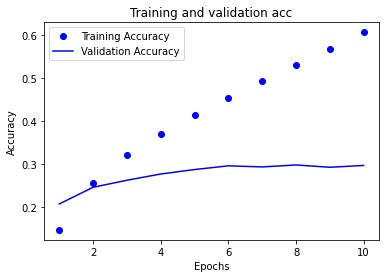

In [16]:
plot_train_val_acc(history_1)

print('Small Conv Network Validation Accuracy: ', round(history_1.history['val_accuracy'][-1]*100,5),'%')

Small Conv network accuracy peaks after 6 epochs with around 30% accuracy

#### Training and Validation Accuracy and Loss Plot Comparisions  


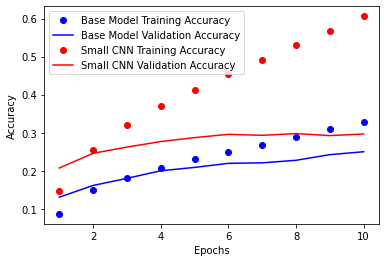

In [18]:
compare_acc(base_model_history, history_1, 'Base Model', 'Small CNN')

#### Add Max Pooling Layers to Conv2D layers
Start with 1 with a 2x2 window

In [19]:
def build_model_2():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=16, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
    
    x = layers.Flatten()(x)
    outputs = layers.Dense(100, activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model_2 = build_model_2()
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                       

In [ ]:
model_2.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
    
)

history_2 = model_2.fit(
    train_images, 
    train_labels,
    epochs=20,
    verbose=2,
    validation_split=0.2
)

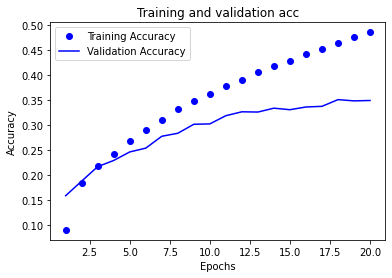

In [21]:
plot_train_val_acc(history_2)

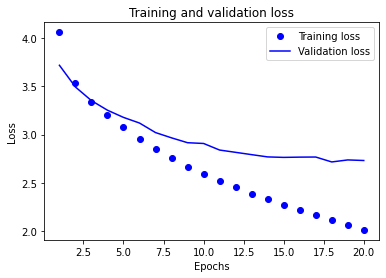

In [22]:
plot_train_val_loss(history_2)

Validation accuracy still climbing so run for more epochs

### Add Dense Layer
Set units to 128 because I think it should be bigger than the final softmax dense layer = 100 units  
Not really sure and would like to learn more about this 

In [11]:
def build_model_3():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=16, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model_3 = build_model_3()
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                       

In [ ]:
model_3.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_3 = model_3.fit(
    train_images, 
    train_labels,
    epochs=50,
    verbose=2,
    validation_split=0.2
)

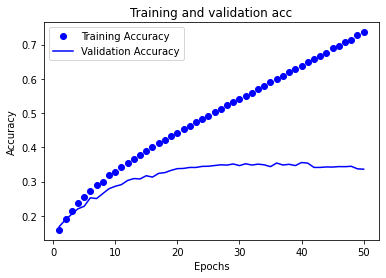

In [17]:
plot_val_loss_acc(history_3)

### Add another Conv2D Layer and MaxPooling Layer

In [10]:
def build_model_4():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=16, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.Flatten()(x)
    
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model_4 = build_model_4()
model_4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                       

In [ ]:
model_4.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_4 = model_4.fit(
    train_images, 
    train_labels,
    epochs=20,
    verbose=2,
    validation_split=0.2
)

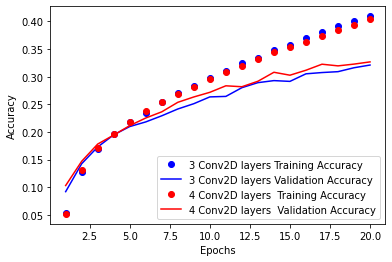

In [29]:
compare_acc(history_3, history_4, '3 Conv2D layers', '4 Conv2D layers ')


### Try changing kernel_size bigger to 4

In [9]:
def build_model_5():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=16, kernel_size=4, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=32, kernel_size=4, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=64, kernel_size=4, activation="relu", padding='same')(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model_5 = build_model_5()
model_5.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                         

In [ ]:
model_5.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_5 = model_5.fit(
    train_images, 
    train_labels,
    epochs=20,
    verbose=2,
    validation_split=0.2
)

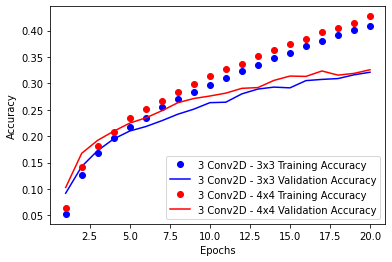

In [32]:
compare_acc(history_3, history_5, '3 Conv2D - 3x3', '3 Conv2D - 4x4')


Not much Difference, stick with standard 3x3 window

### Test lower higher learning rate

In [ ]:
model_6 = build_model_3()

model_6.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_6 = model_6.fit(
    train_images, 
    train_labels,
    epochs=20,
    verbose=2,
    validation_split=0.2
)

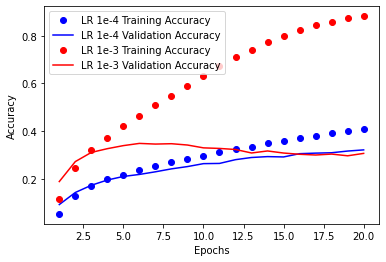

In [41]:
compare_acc(history_3, history_6, 'LR 1e-4', 'LR 1e-3')


1e-4 Training rate shows steady increase still by end of training.  
1e-3 validation accuracy peaks much sooner.  Could be worth training for more epochs.  

In [ ]:
model_7 = build_model_3()

model_7.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_7 = model_7.fit(
    train_images, 
    train_labels,
    epochs=50,
    verbose=2,
    validation_split=0.2
)

In [ ]:
compare_acc(h)

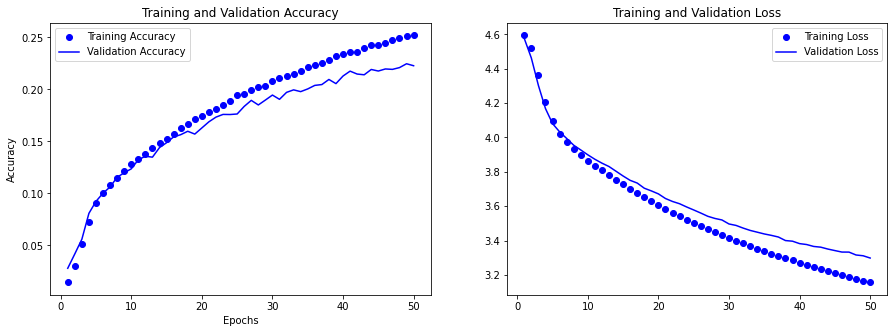

In [13]:
plot_val_loss_acc(history_7)

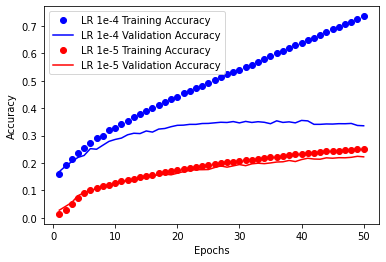

In [20]:
compare_acc(history_3, history_7, 'LR 1e-4', 'LR 1e-5')


Learning rate of 1e-4 much better than 1e-5 even after running for 50 epochs. Evident validation accuracy for 1e-5 will never increase to 30%.

### Increase Starting Units

In [22]:
def build_model_8():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model_8 = build_model_8()
model_8.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                      

In [ ]:
model_8.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_8 = model_8.fit(
    train_images, 
    train_labels,
    epochs=50,
    verbose=2,
    validation_split=0.2
)

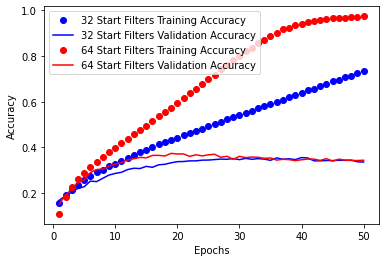

In [27]:
compare_acc(history_3, history_8, '32 Start Filters','64 Start Filters')

**64 starting units better than 32**

In [101]:
def build_model_8b():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same')(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model_8b = build_model_8b()
model_8b.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_22 (Rescaling)    (None, 32, 32, 3)         0         
                                                                 
 conv2d_71 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 8, 8, 256)        0         
 g2D)                                                     

In [ ]:
model_8b.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_8b = model_8b.fit(
    train_images, 
    train_labels,
    epochs=50,
    verbose=2,
    validation_split=0.2
)

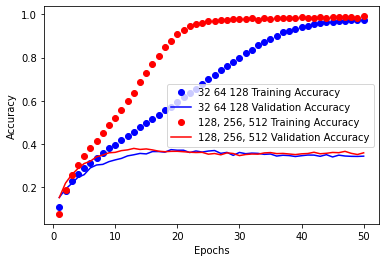

In [103]:
compare_acc(history_8, history_8b, '32 64 128','128, 256, 512')
compare_loss(history_8, history_8b, '32 64 128','128, 256, 512')

Higher units better, stick with 128, 256, 512

### Remove Padding (9)


In [ ]:
def build_model_9():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model_9 = build_model_9()
model_9.summary()

In [ ]:
model_9.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_9 = model_9.fit(
    train_images, 
    train_labels,
    epochs=50,
    verbose=2,
    validation_split=0.2
)

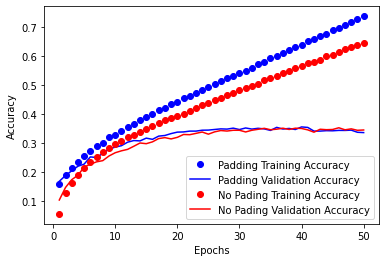

In [28]:
compare_acc(history_3, history_9, 'Padding','No Pading')

Padding slightly more accurate it seems

Best Model is currently 8. Compare with that going forward. 

Add another Conv layer

In [ ]:
def build_model_10():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)

    x = layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same')(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='Model_10_4_Conv2d_layers')
    return model

model_10 = build_model_10()
model_10.summary()

In [ ]:
model_10.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_10 = model_10.fit(
    train_images, 
    train_labels,
    epochs=50,
    verbose=2,
    validation_split=0.2
)

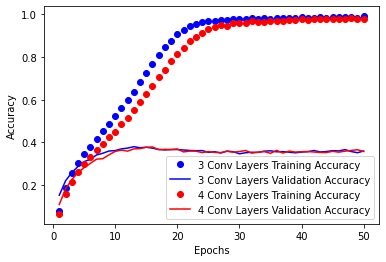

In [108]:
compare_acc(history_8b, history_10, '3 Conv Layers','4 Conv Layers')

No difference really, slight edge to 3 layers so stick with that. 

### Data Augmentation (Aug)

Paper references:
- Keras' ImageDataGenerator()
- shear, zoom, horizontal flip, featurewise center, width shift
tuned to extend dataset

In [ ]:
data_augmentation = keras.Sequential([
      layers.RandomFlip('horizontal_and_vertical', input_shape=(32,32,3)),
      layers.RandomRotation(0.2),
      layers.RandomZoom(0.2)
])

def build_model_augment_1():
    inputs = keras.Input(shape=(32, 32, 3))
    x = data_augmentation(inputs)

    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same')(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='model_augment_1')
    return model

model_augment_1 = build_model_augment_1()
model_augment_1.summary()

In [ ]:
model_augment_1.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_augment_1 = model_augment_1.fit(
    train_images, 
    train_labels,
    epochs=25,
    verbose=2,
    validation_split=0.2
)

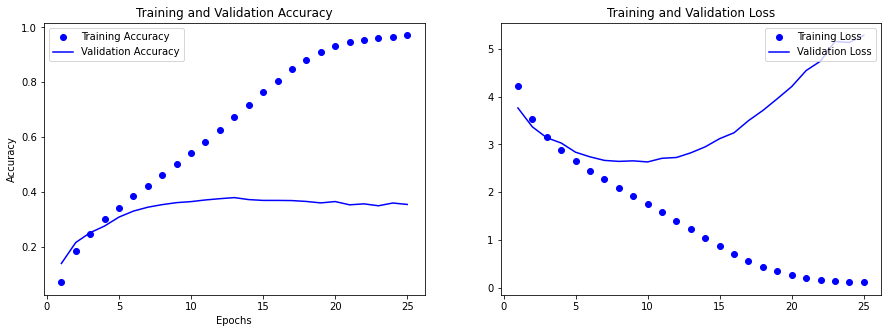

In [122]:
plot_val_loss_acc(history_augment_1)

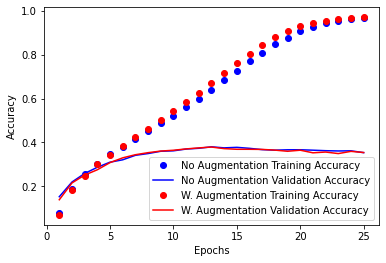

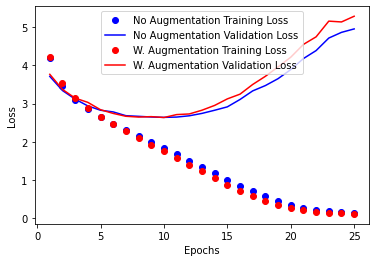

In [124]:
compare_acc(history_8b, history_augment_1, 'No Augmentation','W. Augmentation')
compare_loss(history_8b, history_augment_1, 'No Augmentation','W. Augmentation')


Adding dropout layer improves model. Image Augmentation does not show much improvement. 

### More Dense Layers w. Dropout (11)

In [ ]:
def build_model_11():
    inputs = keras.Input(shape=(32, 32, 3))
    
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same')(x)
    
    x = layers.Flatten()(x)
    
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)


    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='Model_Augmentation_W_Dropout')
    return model

model_11 = build_model_11()
model_11.summary()

In [ ]:
model_11.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_11 = model_11.fit(
    train_images, 
    train_labels,
    epochs=30,
    verbose=2,
    validation_split=0.2
)

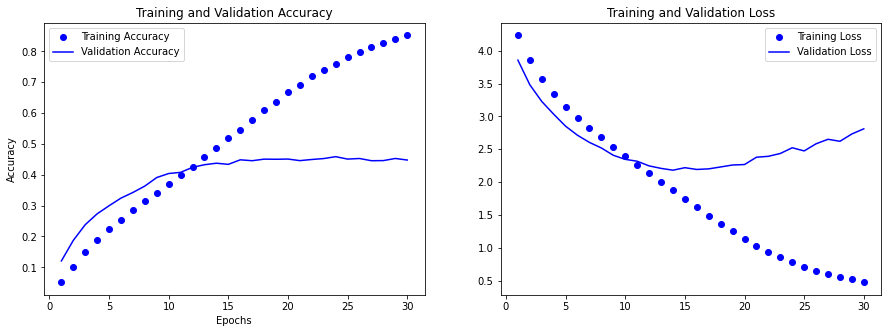

In [130]:
plot_val_loss_acc(history_11)

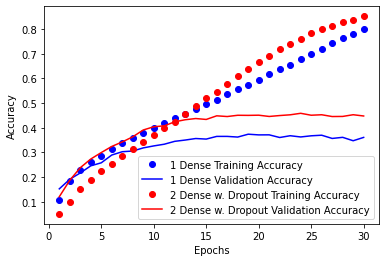

In [129]:
compare_acc(history_8, history_11, '1 Dense','2 Dense w. Dropout')

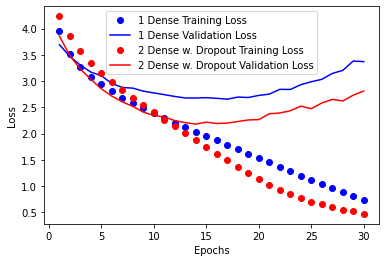

In [136]:
compare_loss(history_8, history_11, '1 Dense','2 Dense w. Dropout')

Adding dropout layers and more dense layers large improvement

### Increase Dense Units (12)

In [131]:
def build_model_12():
    inputs = keras.Input(shape=(32, 32, 3))
    
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same')(x)
    
    x = layers.Flatten()(x)
    
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)


    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='Model_12_2_Dense_w_dropout')
    return model

model_12 = build_model_12()
model_12.summary()

Model: "Model_12_2_Dense_w_dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_31 (Rescaling)    (None, 32, 32, 3)         0         
                                                                 
 conv2d_100 (Conv2D)         (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_101 (Conv2D)         (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 8, 8, 256)        0         
 g2D)                                   

In [ ]:
model_12.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_12 = model_12.fit(
    train_images, 
    train_labels,
    epochs=30,
    verbose=2,
    validation_split=0.2
)

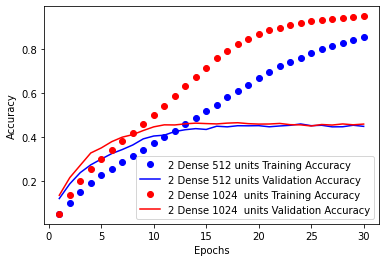

In [133]:
compare_acc(history_11, history_12, '2 Dense 512 units','2 Dense 1024  units')

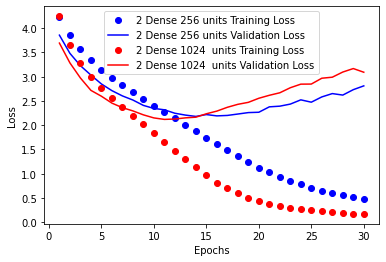

In [134]:
compare_loss(history_11, history_12, '2 Dense 256 units','2 Dense 1024  units')

In [140]:
def get_max_val_acc_epoch(history):
  val_acc = history.history['val_accuracy']
  max_val_acc = round(max(val_acc),5)
  max_epoch = np.argmax(val_acc)
  print('Max Validation Accuracy: ', max_val_acc, '\t Num Epoch: ', max_epoch)
  return 
  
def get_min_val_loss_epoch(history):
  val_loss = history.history['val_loss']
  min_val_loss = round(min(val_loss),5)
  min_epoch = np.argmin(val_loss)
  print('Min Validation Loss: ', min_val_loss, '\t Num Epoch: ', min_epoch)
  return 
  

print('Model 11')
get_max_val_acc_epoch(history_11)
get_min_val_loss_epoch(history_11)

print('Model 12')
get_max_val_acc_epoch(history_12)
get_min_val_loss_epoch(history_12)



Model 11
Max Validation Accuracy:  0.4588 	 Num Epoch:  23
Min Validation Loss:  2.18107 	 Num Epoch:  13
Model 12
Max Validation Accuracy:  0.4644 	 Num Epoch:  17
Min Validation Loss:  2.11971 	 Num Epoch:  10


Model 12 Better: 
Bigger units means lower loss and higher accuracy 
sooner around 

### + Max Pooling Layer to last Conv2d Layer (13)

In [ ]:
def build_model_13():
    inputs = keras.Input(shape=(32, 32, 3))
    
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Flatten()(x)
    
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)


    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='Model_12_2_Dense_w_dropout')
    return model


model_13 = build_model_13()
model_13.summary()

In [ ]:
model_13.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_13 = model_13.fit(
    train_images, 
    train_labels,
    epochs=20,
    verbose=2,
    validation_split=0.2
)

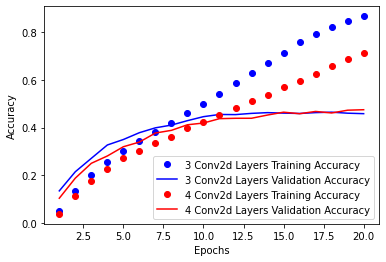

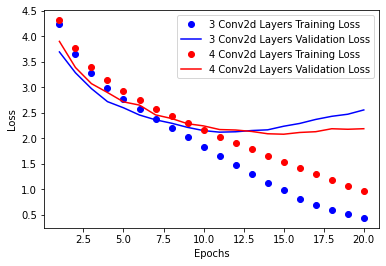

In [144]:
compare_acc(history_12, history_13, '2 Max Pools','3 Max Pools')
compare_loss(history_12, history_13, '2 Max Pools','3 Max Pools')

In [149]:
print('Model 12')
get_max_val_acc_epoch(history_12)
get_min_val_loss_epoch(history_12)

print('\nModel 13')
get_max_val_acc_epoch(history_13)
get_min_val_loss_epoch(history_13)

Model 12
Max Validation Accuracy:  0.4644 	 Num Epoch:  17
Min Validation Loss:  2.11971 	 Num Epoch:  10

Model 13
Max Validation Accuracy:  0.4747 	 Num Epoch:  19
Min Validation Loss:  2.07939 	 Num Epoch:  14


Not significant enough improvement, stick with model 12
### Dropout after input? (14) 
Mentioned in paper, dropout 0.2



In [ ]:
def build_model_14():
    inputs = keras.Input(shape=(32, 32, 3))
    
    x = layers.Rescaling(1./255)(inputs) 
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Flatten()(x)
    
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)


    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='Model_14_Early_Dropout')
    return model


model_14 = build_model_14()
model_14.summary()

In [ ]:
model_14.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_14 = model_14.fit(
    train_images, 
    train_labels,
    epochs=20,
    verbose=2,
    validation_split=0.2
)

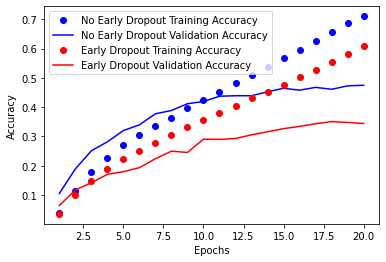

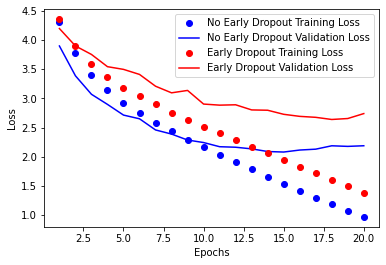

In [154]:
compare_acc(history_13, history_14, 'No Early Dropout','Early Dropout')
compare_loss(history_13, history_14, 'No Early Dropout','Early Dropout')


### Batch Normalization (15)

Section 9.3.3 of text


In [ ]:
def build_model_15():
    inputs = keras.Input(shape=(32, 32, 3))
    
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=128, kernel_size=3, use_bias=False, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=256, kernel_size=3, use_bias=False, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=512, kernel_size=3, use_bias=False, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Flatten()(x)
    
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)


    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='Model_15_Batch_Normalization')
    return model

model_15 = build_model_15()
model_15.summary()

In [ ]:
model_15.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_15 = model_15.fit(
    train_images, 
    train_labels,
    epochs=20,
    verbose=2,
    validation_split=0.2
)

Model 13
Min Validation Loss:  2.07939 	 Num Epoch:  14
Max Validation Accuracy:  0.4747 	 Num Epoch:  19

Model 15
Min Validation Loss:  2.23404 	 Num Epoch:  18
Max Validation Accuracy:  0.4208 	 Num Epoch:  17


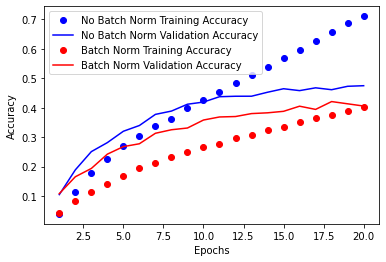

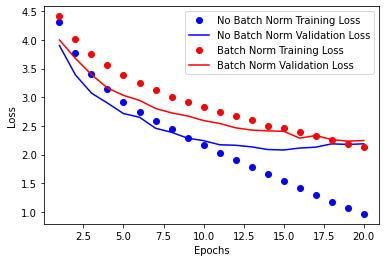

In [160]:
print('Model 13')
get_min_val_loss_epoch(history_13)
get_max_val_acc_epoch(history_13)
print('\nModel 15')
get_min_val_loss_epoch(history_15)
get_max_val_acc_epoch(history_15)

compare_acc(history_13, history_15, 'No Batch Norm','Batch Norm')
compare_loss(history_13, history_15, 'No Batch Norm','Batch Norm')

Batch Normalization did not improve model

### Residuals (16)
Section 9.3.2 of text

In [16]:
def build_model_16():
    inputs = keras.Input(shape=(32, 32, 3))
    
    x = layers.Rescaling(1./255)(inputs) 
    
    def residual_block(x, filters, pooling=False): 
      residual = x
      x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
      x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
      if pooling:
        x = layers.MaxPooling2D(2, padding="same")(x)
        residual = layers.Conv2D(filters, 1, strides=2)(residual) 
      elif filters != residual.shape[-1]:
        residual = layers.Conv2D(filters, 1)(residual) 
      x = layers.add([x, residual])
      return x
    
    x = residual_block(x, 128, pooling=True)
    x = residual_block(x, 256, pooling=True)
    x = residual_block(x, 512, pooling=True)

    x = layers.Flatten()(x)
    
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)


    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='Model_16_Residuals')
    return model

model_16 = build_model_16()
model_16.summary()

Model: "Model_16_Residuals"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling_3 (Rescaling)        (None, 32, 32, 3)    0           ['input_7[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 128)  3584        ['rescaling_3[0][0]']            
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 128)  147584      ['conv2d[0][0]']                 
                                                                                 

In [ ]:
model_16.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_16 = model_16.fit(
    train_images, 
    train_labels,
    epochs=20,
    verbose=2,
    validation_split=0.2
)

Model 13
Min Validation Loss:  2.07939 	 Num Epoch:  14
Max Validation Accuracy:  0.4747 	 Num Epoch:  19

Model 16
Min Validation Loss:  2.08958 	 Num Epoch:  9
Max Validation Accuracy:  0.4732 	 Num Epoch:  17


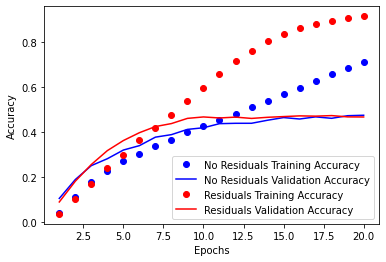

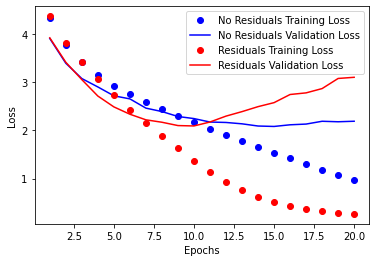

In [164]:
print('Model 13')
get_min_val_loss_epoch(history_13)
get_max_val_acc_epoch(history_13)
print('\nModel 16')
get_min_val_loss_epoch(history_16)
get_max_val_acc_epoch(history_16)

compare_acc(history_13, history_16, 'No Residuals','Residuals')
compare_loss(history_13, history_16, 'No Residuals','Residuals')

Residuals actually perform well enough to include. Use Model 16.  

### Depthwise Separable Convolution Layers (17)
Section 9.3.4  

In [ ]:
def build_model_17():
    inputs = keras.Input(shape=(32, 32, 3))
    
    x = layers.Rescaling(1./255)(inputs) 
    # need a conv2d layer to begin to handle color
    x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
    def residual_block(x, filters, pooling=False): 
      residual = x
      x = layers.SeparableConv2D(filters, 3, activation="relu", padding="same")(x)
      x = layers.SeparableConv2D(filters, 3, activation="relu", padding="same")(x)
      if pooling:
        x = layers.MaxPooling2D(2, padding="same")(x)
        residual = layers.Conv2D(filters, 1, strides=2)(residual) 
      elif filters != residual.shape[-1]:
        residual = layers.Conv2D(filters, 1)(residual) 
      x = layers.add([x, residual])
      return x
    
    x = residual_block(x, 128, pooling=True)
    x = residual_block(x, 256, pooling=True)
    x = residual_block(x, 512, pooling=True)

    x = layers.Flatten()(x)
    
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)


    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='Model_16_Residuals')
    
    return model


model_17 = build_model_17()
model_17.summary()

In [ ]:
model_17.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_17 = model_17.fit(
    train_images, 
    train_labels,
    epochs=30,
    verbose=2,
    validation_split=0.2
)

Model 16
Min Validation Loss:  2.08958 	 Num Epoch:  9
Max Validation Accuracy:  0.4732 	 Num Epoch:  17

Model 17
Min Validation Loss:  2.40275 	 Num Epoch:  25
Max Validation Accuracy:  0.4116 	 Num Epoch:  29
20
[0.08990000188350677, 0.12439999729394913, 0.15060000121593475, 0.1800999939441681, 0.20569999516010284, 0.22110000252723694, 0.24210000038146973, 0.25870001316070557, 0.27889999747276306, 0.28769999742507935, 0.30390000343322754, 0.31220000982284546, 0.32690000534057617, 0.33570000529289246, 0.34860000014305115, 0.35339999198913574, 0.3621000051498413, 0.3671000003814697, 0.3671000003814697, 0.38199999928474426]


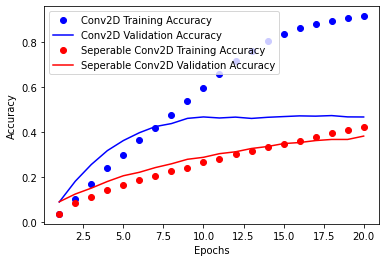

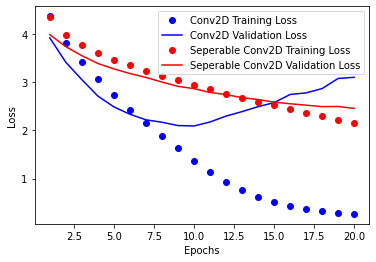

In [193]:
print('Model 16')
get_min_val_loss_epoch(history_16)
get_max_val_acc_epoch(history_16)
print('\nModel 17')
get_min_val_loss_epoch(history_17)
get_max_val_acc_epoch(history_17)

compare_acc(history_16, history_17, 'Conv2D','Seperable Conv2D')
compare_loss(history_16, history_17, 'Conv2D','Seperable Conv2D')

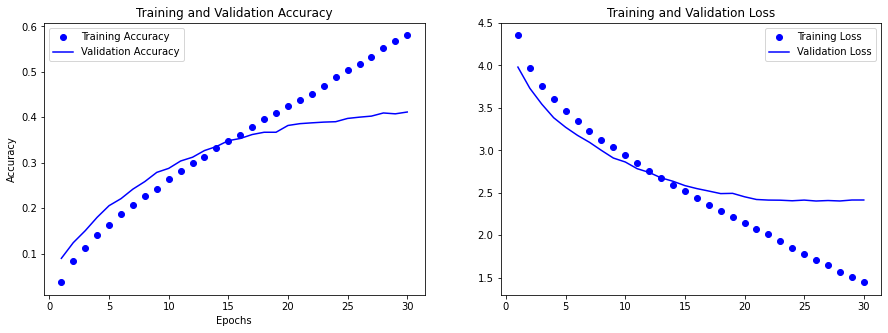

In [192]:
plot_val_loss_acc(history_17)


Train for longer

In [ ]:
model_17a = build_model_17()
model_17a.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_17a = model_17a.fit(
    train_images, 
    train_labels,
    epochs=60,
    verbose=2,
    validation_split=0.2
)

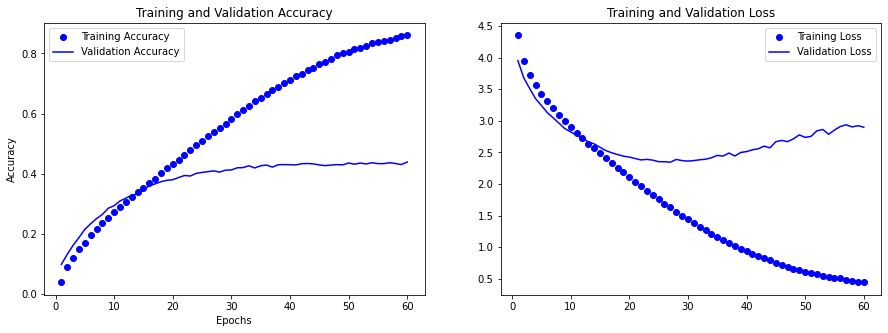

In [195]:
plot_val_loss_acc(history_17a)


Doesn't make it any lower after longer training so model 16 still best model. 

## Pretrained model

- Weights: specifies the weight checkpoint from which to initialize the model 
- ```include_top```: including or not the densely connected classifier on top of the network. By default this densely connected classifier corresponds to the 1000 classes from ImageNet. Because we intend to use our own densely connected classifier don't include

### Base Pretrained VGG16 (FT1)

In [ ]:
base_model_vgg16 = keras.applications.vgg16.VGG16(
    weights='imagenet',
    input_shape = (32,32,3),
    include_top=False
)

def build_ft_model_1():
    
    base_model_vgg16.trainable=False

    inputs = keras.Input(shape=(32, 32, 3))
   
    x = keras.applications.vgg16.preprocess_input(inputs)

    x = base_model_vgg16(x, training=False)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    
    x = layers.Dense(2048, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(100, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='FT_Model')

    return model

ft_model_1 = build_ft_model_1()
ft_model_1.summary()


In [ ]:
ft_model_1.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_ft_1 = ft_model_1.fit(
    train_images, 
    train_labels,
    epochs=30,
    verbose=2,
    validation_split=0.2
)

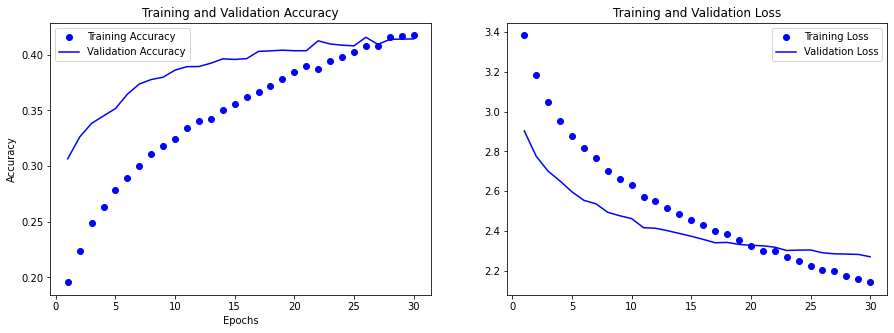

In [96]:
plot_val_loss_acc(history_ft_1)

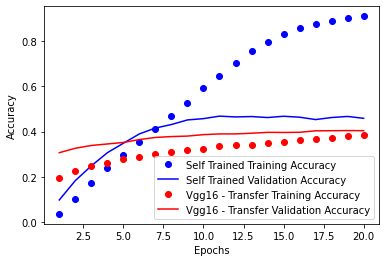

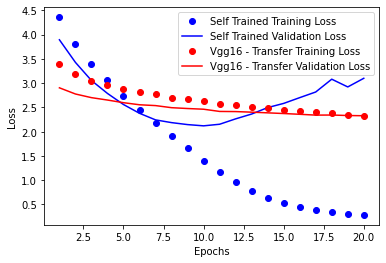

In [98]:
compare_acc(history_16, history_ft_1, 'Self Trained', 'Vgg16 - Transfer')
compare_loss(history_16, history_ft_1, 'Self Trained', 'Vgg16 - Transfer')

#### Fine Tune FT1
Lower learning rate from 1e-4 to 1e-5

In [ ]:

base_model_vgg16.trainable = True

for layer in base_model_vgg16.layers[:-4]:
 layer.trainable = False

ft_model_1.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_ft_1 = ft_model_1.fit(
    train_images, 
    train_labels,
    epochs=30,
    verbose=2,
    validation_split=0.2
)

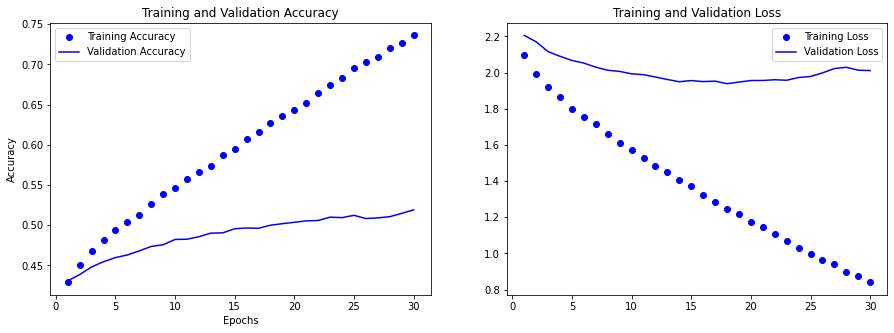

In [106]:
plot_val_loss_acc(history_ft_1)

Overfitting after about 15 epochs so build model for 15 epochs for final model

 Significant improvement over own model. 


### Data Augmentation and Dropout (FT 2)
 - Add Data Augmentation back in and a dropout layer
 - Reguralize with a dropout layer between globalaverage and softmax
 - Add another dense layer between with dropout

In [ ]:
data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.1),
 ]
)

def build_ft_model_2():
    
    base_model_vgg16.trainable=False

    inputs = keras.Input(shape=(32, 32, 3))
    x = data_augmentation(inputs)

    x = keras.applications.vgg16.preprocess_input(x)

    x = base_model_vgg16(x, training=False)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    
    x = layers.Dense(2048, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(100, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='FT_Model')
    return model

ft_model_2 = build_ft_model_2()
ft_model_2.summary()

In [ ]:
ft_model_2.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_ft_2 = ft_model_2.fit(
    train_images, 
    train_labels,
    epochs=30,
    verbose=2,
    validation_split=0.2
)

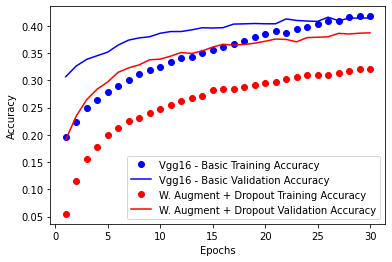

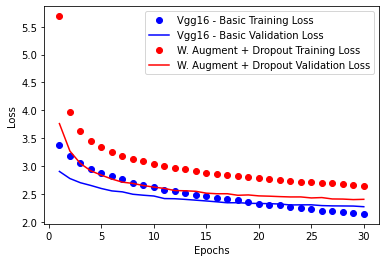

In [101]:
compare_acc(history_ft_1, history_ft_2, 'Vgg16 - Basic', 'W. Augment')
compare_loss(history_ft_1, history_ft_2, 'Vgg16 - Basic', 'W. Augment')

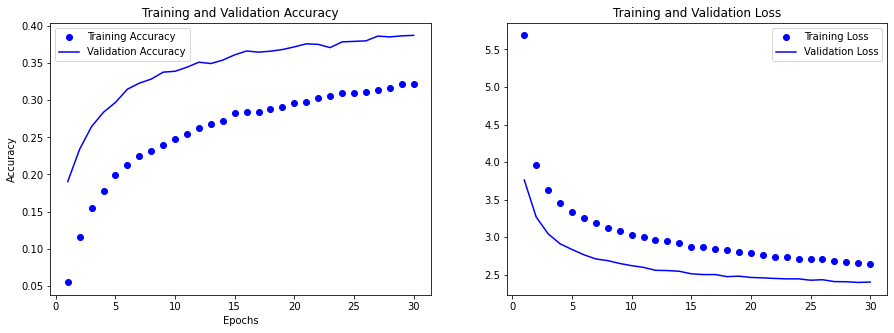

In [102]:
plot_val_loss_acc(history_ft_2)

Augmentation again does not improve results

Try with the `vgg16.preprocess_input()`


In [ ]:
def build_ft_model_3():
  base_model_vgg16.trainable=False

  inputs = keras.Input(shape=(32, 32, 3))
  
  x = keras.applications.vgg16.preprocess_input(inputs)
  x = base_model_vgg16(x, training=False)

  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(1024, activation='relu')(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(1024, activation='relu')(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(1024, activation='relu')(x)
  x = layers.Dropout(0.2)(x)

  outputs = layers.Dense(100, activation='softmax')(x)
  
  model = keras.Model(inputs=inputs, outputs=outputs, name='FT_Model_2_Augmentation_Dropout')
  return model

ft_model_3 = build_ft_model_3()
ft_model_3.summary()

In [ ]:
ft_model_3.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_ft_3 = ft_model_3.fit(
    train_images, 
    train_labels,
    epochs=25,
    verbose=2,
    validation_split=0.2
)

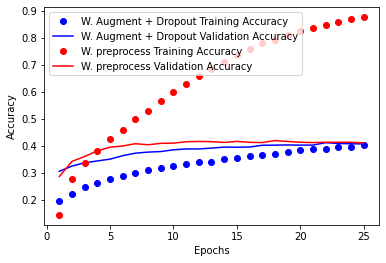

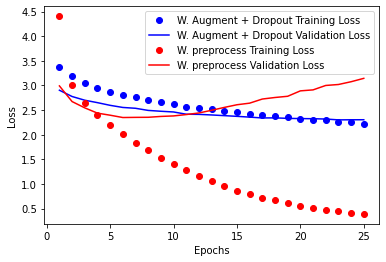

In [104]:
compare_acc(history_ft_1, history_ft_3, 'W. Augment + Dropout', 'W. preprocess')
compare_loss(history_ft_1, history_ft_3, 'W. Augment + Dropout', 'W. preprocess')

Augmentation and Dropout improved accuracy. Use this for final model. Overfitting after 6 epochs so train for 6. 



## Final Model

### Final Pre-Trained Model

In [107]:
base_model_vgg16 = keras.applications.vgg16.VGG16(
    weights='imagenet',
    input_shape = (32,32,3),
    include_top=False
)

def build_final_model_pre_trained():
    
    base_model_vgg16.trainable=False

    inputs = keras.Input(shape=(32, 32, 3))
   
    x = keras.applications.vgg16.preprocess_input(inputs)

    x = base_model_vgg16(x, training=False)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    
    x = layers.Dense(2048, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(100, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='FT_Model')

    return model

final_model_pretrained = build_final_model_pre_trained()
final_model_pretrained.summary()

Model: "FT_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_46 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 tf.__operators__.getitem_9   (None, 32, 32, 3)        0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_9 (TFOpLambd  (None, 32, 32, 3)        0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d_26  (None, 512)              0         
  (GlobalAveragePooling2D)                                       
                                                          

#### Train the top layer on all data, no more holdout validation data. 



In [ ]:
final_model_pretrained.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_final_pretrained = final_model_pretrained.fit(
    train_images, 
    train_labels,
    epochs=30,
    verbose=2,
)

In [109]:
base_model_vgg16.trainable = True

for layer in base_model_vgg16.layers[:-4]:
 layer.trainable = False

final_model_pretrained.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)
final_model_pretrained.summary()

Model: "FT_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_46 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 tf.__operators__.getitem_9   (None, 32, 32, 3)        0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_9 (TFOpLambd  (None, 32, 32, 3)        0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d_26  (None, 512)              0         
  (GlobalAveragePooling2D)                                       
                                                          

In [ ]:
final_model_pretrained.fit(
    train_images, 
    train_labels,
    epochs=15,
    verbose=2,
)

#### Evaluate Model On Test Data

In [113]:
final_results_pretrained = final_model_pretrained.evaluate(test_images, test_labels)
print('Final Pre-trained Model Accuracy: ', round(final_results_pretrained[1]*100,2),'%')
print('Final Pre-trained Model Loss: ', final_results_pretrained[0])

313/313 [==============================] - 1s 4ms/step - loss: 1.8315 - accuracy: 0.5193
Final Pre-trained Model Accuracy:  51.93 %
Final Pre-trained Model Loss:  1.831539511680603


### Final Self-Trained Model (16)

Overfitting after 10 epochs so train for 10 epochs. 

In [115]:
final_model_self_trained = build_model_16()
final_model_self_trained.summary()


Model: "Model_16_Residuals"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_48 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling_22 (Rescaling)       (None, 32, 32, 3)    0           ['input_48[0][0]']               
                                                                                                  
 conv2d_18 (Conv2D)             (None, 32, 32, 128)  3584        ['rescaling_22[0][0]']           
                                                                                                  
 conv2d_19 (Conv2D)             (None, 32, 32, 128)  147584      ['conv2d_18[0][0]']              
                                                                                 

In [ ]:
final_model_self_trained.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

final_model_self_trained.fit(
    train_images, 
    train_labels,
    epochs=10,
    verbose=2,
)

#### Evaluate Model On Test Data

In [117]:
final_results_self_trained = final_model_self_trained.evaluate(test_images, test_labels)
print('Final Pre-trained Model Accuracy: ', round(final_results_self_trained[1]*100,2),'%')
print('Final Pre-trained Model Loss: ', final_results_self_trained[0])

313/313 [==============================] - 1s 4ms/step - loss: 2.0230 - accuracy: 0.4923
Final Pre-trained Model Accuracy:  49.23 %
Final Pre-trained Model Loss:  2.023005962371826


Custom model hit 49% accuracy compared to 51% using a pretrained network. 